## Importing the required libraries and data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn-bright','dark_background'])

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Cheacking for null values.

In [3]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
data = data.rename(columns={'race/ethnicity':'ethnicity','parental level of education':'parental_education',
                   'test preparation course':'test_prep_course','math score':'math_score',
                   'reading score':'reading_score','writing score':'writing_score'})

In [5]:
data.head()

,gender,ethnicity,parental_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   ethnicity           1000 non-null   object
 2   parental_education  1000 non-null   object
 3   lunch               1000 non-null   object
 4   test_prep_course    1000 non-null   object
 5   math_score          1000 non-null   int64 
 6   reading_score       1000 non-null   int64 
 7   writing_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Creating two new datasets for numerical values and for categorical values.

In [7]:
numeric_data = [x for x in data.columns if data[x].dtype=="int64"]
categorical_data = [y for y in data.columns if data[y].dtype=="object"]

In [8]:
colors = ['orangered','lime','y','c','pink']

In [9]:
numeric_df = pd.DataFrame()
categorical_df = pd.DataFrame()

In [10]:
for i in numeric_data:
    numeric_df[i]=data[i]
for j in categorical_data:
    categorical_df[j] = data[j]

In [11]:
categorical_df.head()

,gender,ethnicity,parental_education,lunch,test_prep_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [12]:
numeric_df.head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


## Visulazing the numeric data

In [13]:
numeric_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
import warnings
warnings.filterwarnings(action="ignore")

###  For the features math score, reading score and writing score ploting a bar plot to visualize the counts for students which have particular marks.

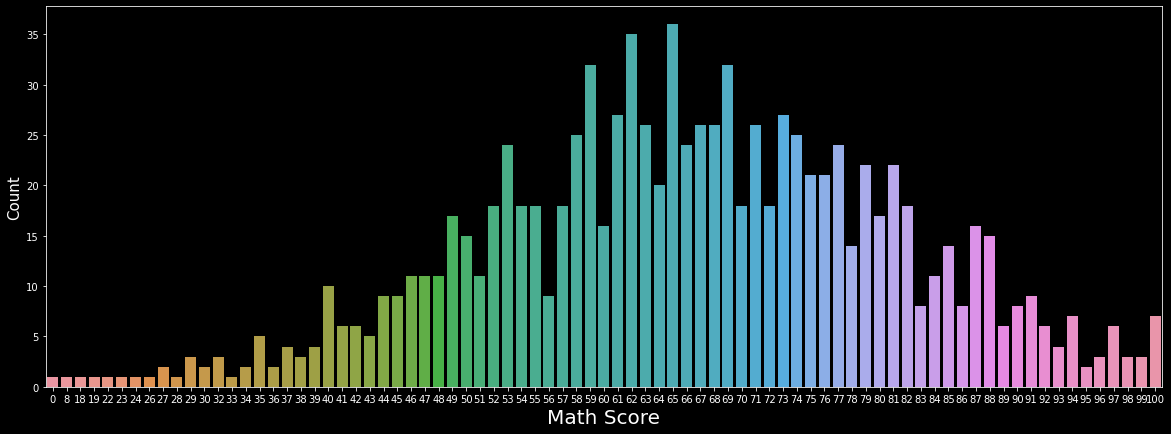

In [15]:
plt.figure(figsize=(20,7))
sns.countplot(numeric_df['math_score'])
plt.xlabel("Math Score",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

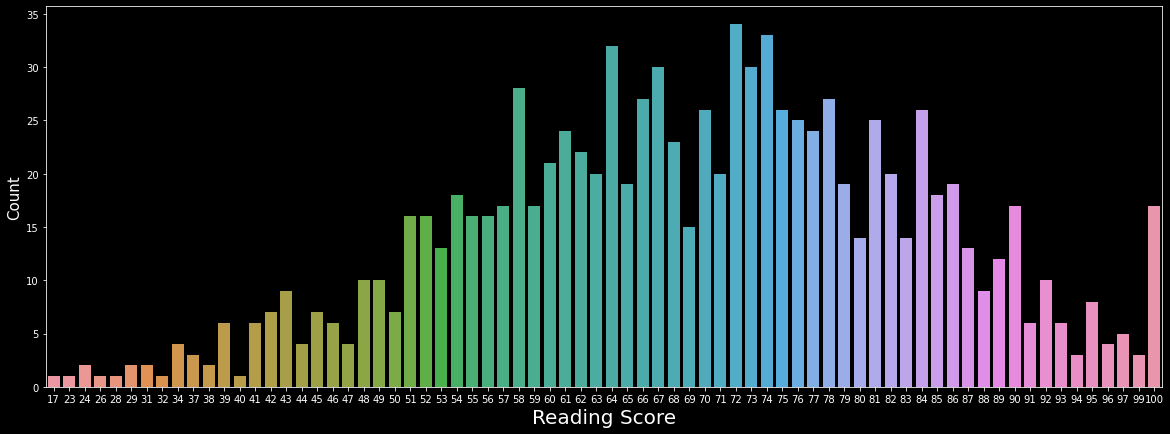

In [16]:
plt.figure(figsize=(20,7))
sns.countplot(numeric_df['reading_score'])
plt.xlabel("Reading Score",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

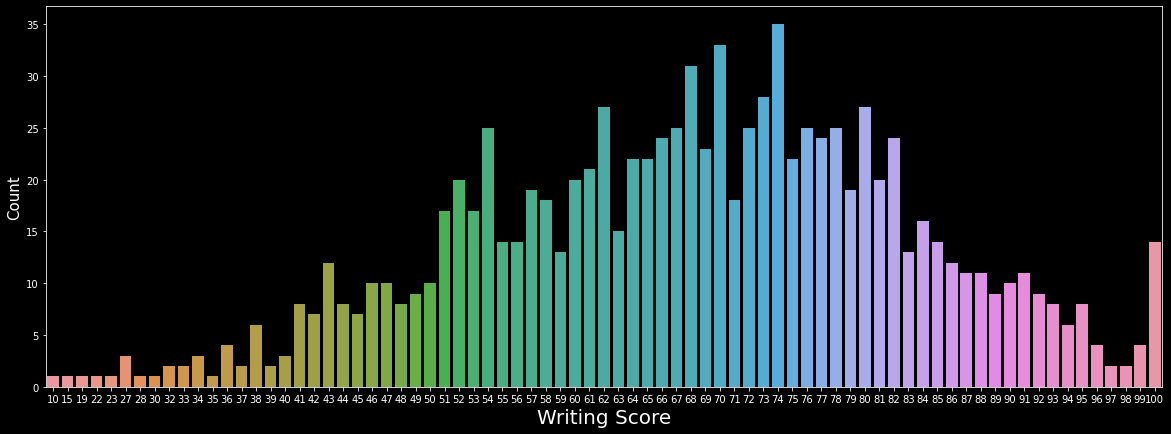

In [17]:
plt.figure(figsize=(20,7))
sns.countplot(numeric_df['writing_score'])
plt.xlabel("Writing Score",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

### It seems like most of the students consists marks between 60-85 for all three scores.

### Cheacking for the spread of data.
### The numeric data consists of normalize data.

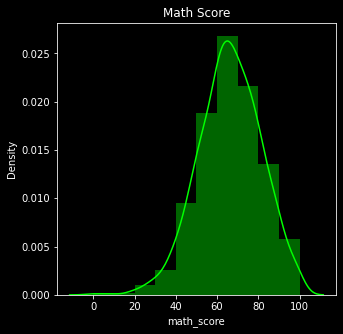

In [18]:
plt.figure(figsize=(5,5))
sns.distplot(numeric_df['math_score'], bins=10, kde=True,color='lime')
plt.title("Math Score")
plt.show()

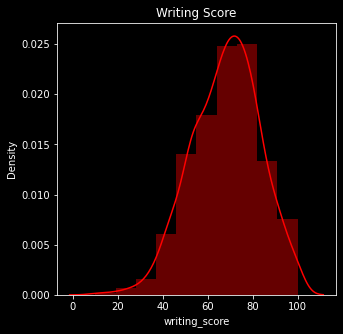

In [19]:
plt.figure(figsize=(5,5))
sns.distplot(numeric_df['writing_score'], bins=10, kde=True,color='r')
plt.title('Writing Score')
plt.show()

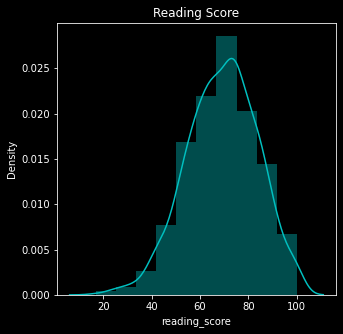

In [20]:
plt.figure(figsize=(5,5))
sns.distplot(numeric_df['reading_score'], bins=10, kde=True,color='c')
plt.title("Reading Score")
plt.show()

## Visualizing categorical data

In [21]:
categorical_df.head()

,gender,ethnicity,parental_education,lunch,test_prep_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [22]:
data.nunique()

gender                 2
ethnicity              5
parental_education     6
lunch                  2
test_prep_course       2
math_score            81
reading_score         72
writing_score         77
dtype: int64

### Ploting the data set as countplot to check which category consists of more data.

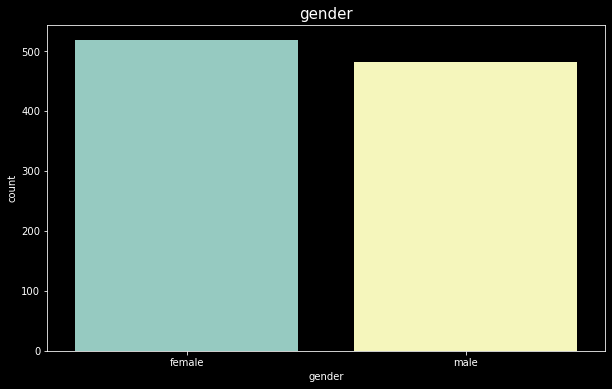

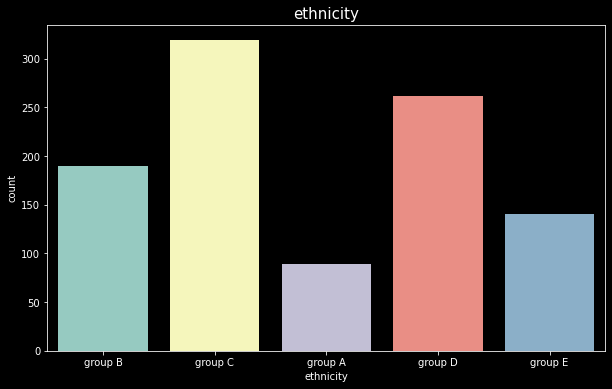

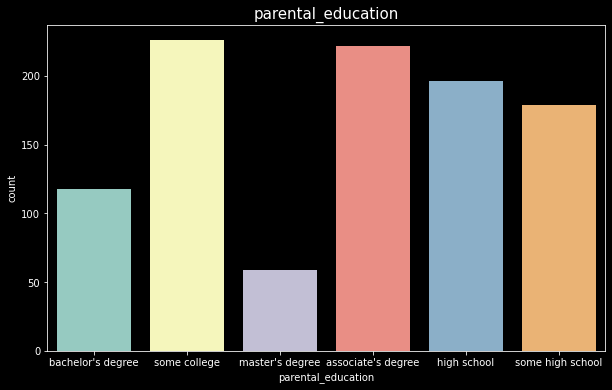

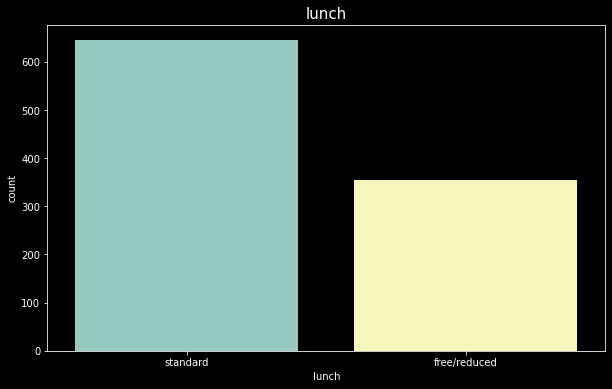

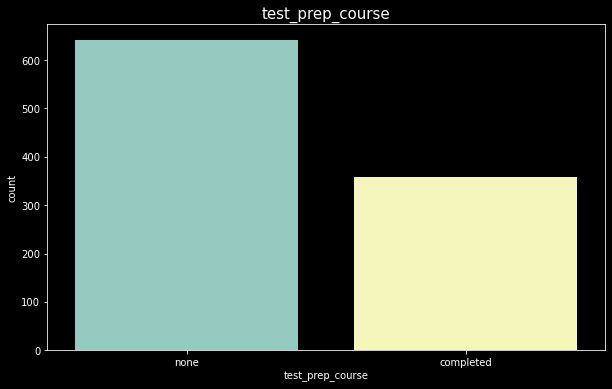

In [23]:
for i in categorical_df:
    plt.figure(figsize=(10,6))
    sns.countplot(categorical_df[i])
    plt.title(i,fontsize=15)
    plt.show()

#### From above plots it says, there are near about equal no. of male and females in gender, group C and group D dominates other groups in ethnicity feature, less no. of parents consists of bachelor's degree or master's degree and most of went to some college, most of students have standard lunch as compared to free, and less students have completed test preparation course.

### Following pie charts shows the percentage of data contained by specific categorical feature.

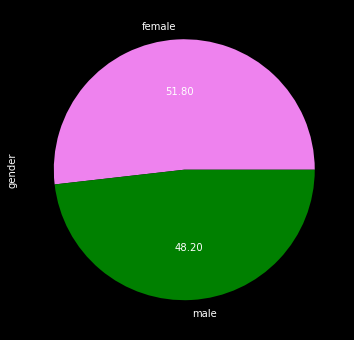

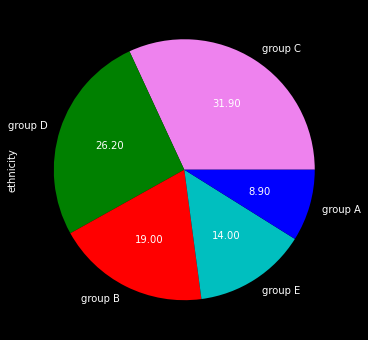

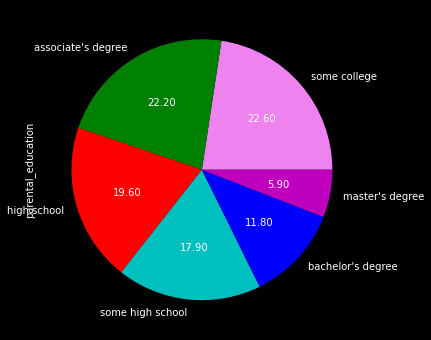

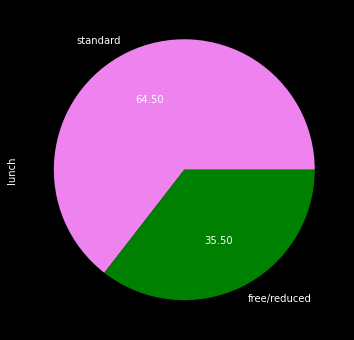

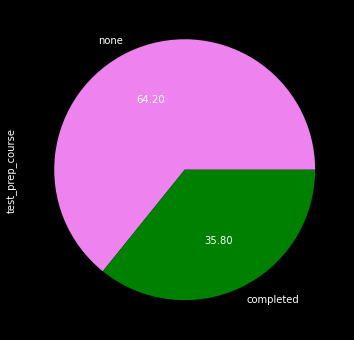

In [24]:
for x in categorical_df:
    plt.figure(figsize=(6,6))
    data[x].value_counts().plot(kind='pie',autopct="%.2f",colors=['violet', 'g','r','c','b','m'])
    plt.show()

### Categorical data Vs Numerical data.

### To detect the outliers , and the quantile of data we create the box plots while comparing the data of features.

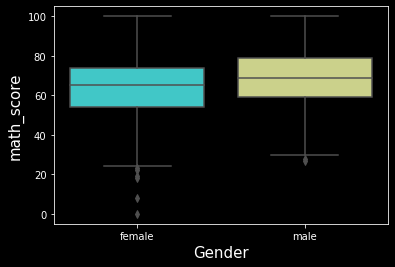

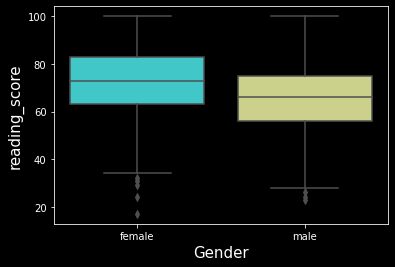

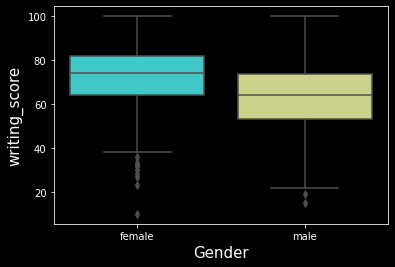

In [25]:
 for i in numeric_df:
    sns.boxplot('gender', i, data=data,palette="rainbow")
    plt.xlabel("Gender",fontsize=15)
    plt.ylabel(i,fontsize=15)
    plt.show()

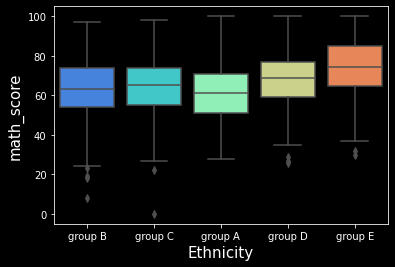

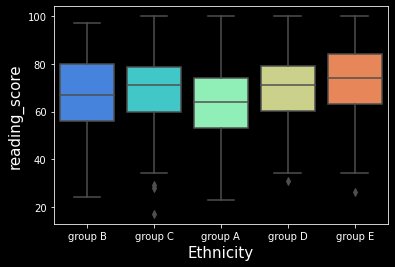

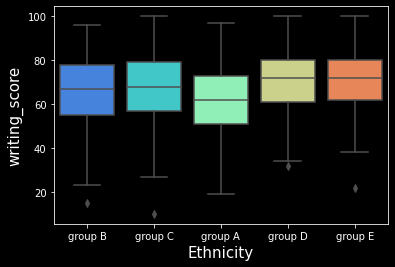

In [26]:
 for i in numeric_df:
    sns.boxplot('ethnicity', i, data=data,palette="rainbow")
    plt.xlabel("Ethnicity",fontsize=15)
    plt.ylabel(i,fontsize=15)
    plt.show()

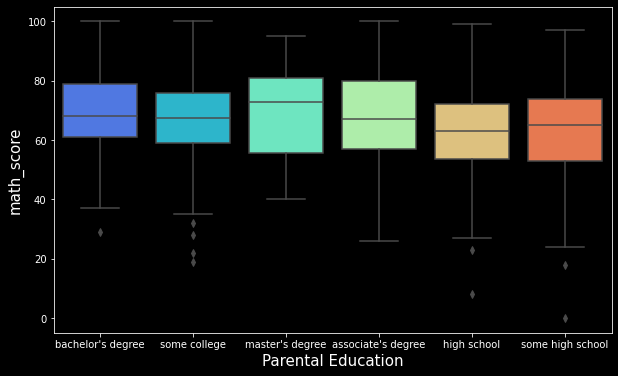

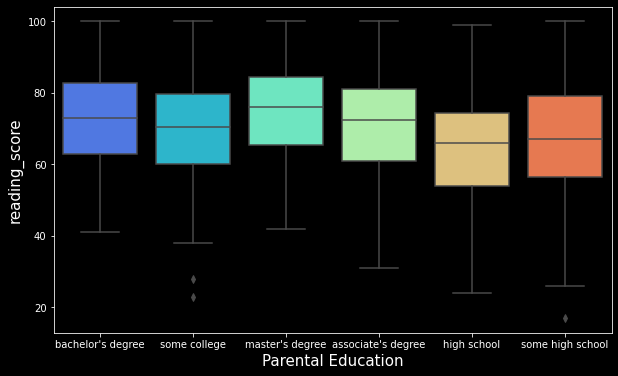

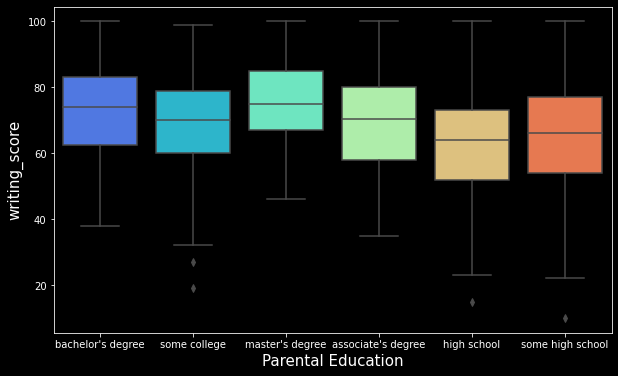

In [27]:
 for i in numeric_df:
    plt.figure(figsize=(10,6))
    sns.boxplot('parental_education', i, data=data,palette="rainbow")
    plt.xlabel("Parental Education",fontsize=15)
    plt.ylabel(i,fontsize=15)
    plt.show()

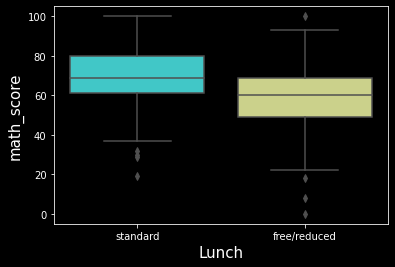

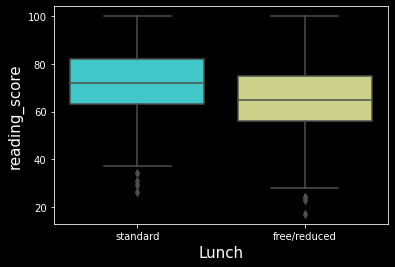

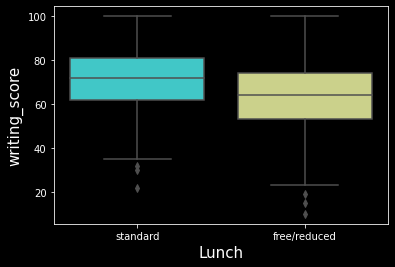

In [28]:
 for i in numeric_df:
    sns.boxplot('lunch', i, data=data,palette="rainbow")
    plt.xlabel("Lunch",fontsize=15)
    plt.ylabel(i,fontsize=15)
    plt.show()

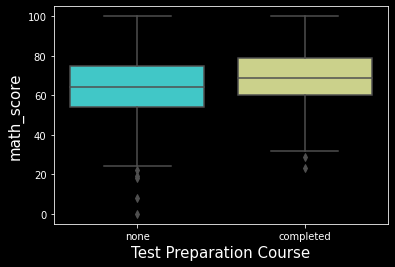

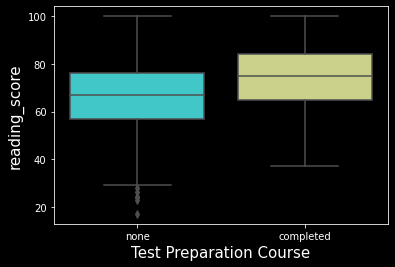

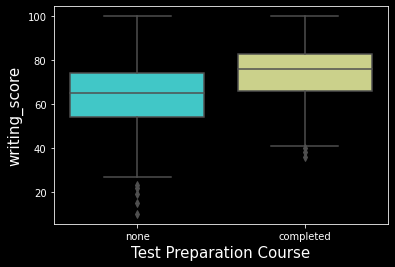

In [29]:
 for i in numeric_df:
    sns.boxplot('test_prep_course', i, data=data,palette="rainbow")
    plt.xlabel("Test Preparation Course",fontsize=15)
    plt.ylabel(i,fontsize=15)
    plt.show()

<Figure size 1800x1800 with 0 Axes>

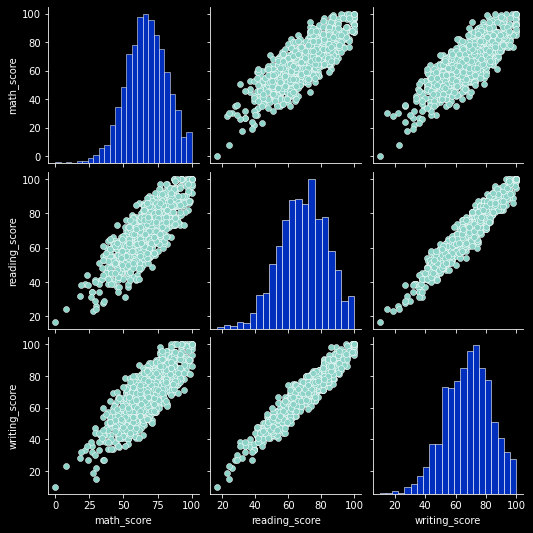

In [30]:
plt.figure(figsize=(25,25))
sns.pairplot(data)
plt.show()

### To check correlation between numeric features here is heatmap.

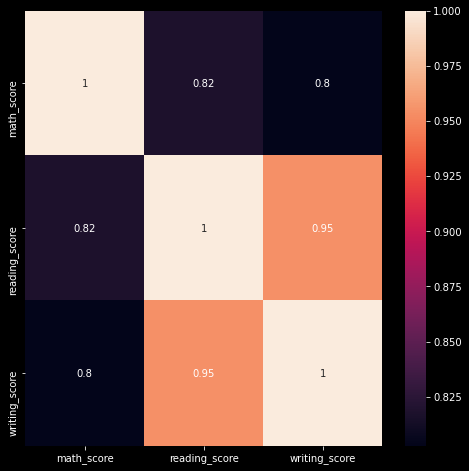

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()